# Comprendre la méthode Kmeans
---

Kmeans est l’algorithme de clustering le plus utilisé en Data Science pour une raison simple : il offre le meilleur compromis entre rapidité d’exécution et facilité d’interprétation. Plutôt que de prédire une valeur, il structure l’information en détectant des motifs naturels dans vos données.

## Qu’est-ce que le kmeans ?

Le kmeans est un algorithme d’apprentissage non supervisé. Contrairement aux méthodes supervisées qui s’appuient sur des données étiquetées (ex: prédire un prix), la méthode kmeans travaille « à l’aveugle » sur des données brutes.

Son but est de partitionner un jeu de données en un certains nombre de groupes distincts (clusters). La valeur k correspond au nombre de groupes. L’algorithme cherche à résoudre simultanément deux contraintes géométriques :

- Cohésion : Les points d’un même groupe doivent être très proches les uns des autres (minimiser la distance au centre du groupe).
- Séparation : On cherche à maximiser la distance entre les groupes pour qu’ils soient le plus séparés possible.


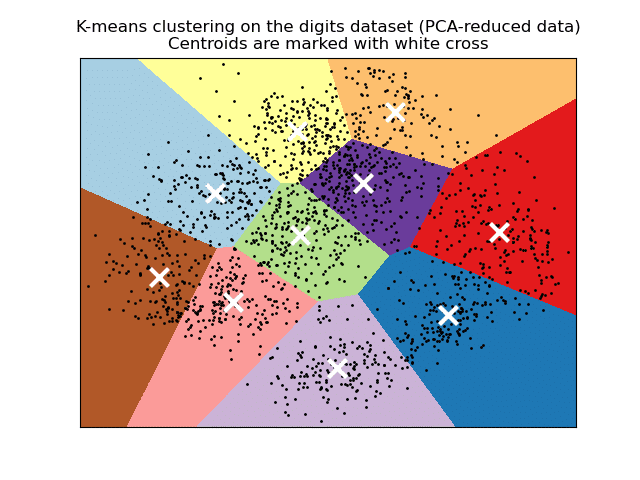

## Comment fonctionne kmeans ?

La mécanique du K-Means est itérative. Il repose sur la notion de centroïde, un point fictif qui représente le centre de gravité d’un cluster.

Le cycle se déroule en quatre étapes :

- **Initialisation** : On définit le nombre de clusters k. L’algorithme place aléatoirement k centroïdes dans l’espace des données.
- **Affectation (assignment)** : Chaque point de données est assigné au centroïde le plus proche (selon la distance euclidienne).
- **Mise à jour (update)** : On recalcule la position des centroïdes. Le nouveau centroïde devient la moyenne exacte des positions de tous les points qui lui ont été assignés.
- **Convergence** : On répète les étapes 2 et 3. L’algorithme s’arrête quand les centroïdes se stabilisent ou qu’un nombre maximal d’itérations est atteint.

Petite précision sur l’initialisation de kmeans. Une initialisation purement aléatoire peut piéger l’algorithme dans une configuration sous-optimale.

La variante kmeans++ (activée par défaut dans Scikit-learn) place les premiers centroïdes de manière intelligente (éloignés les uns des autres), ce qui accélère la convergence et améliore la qualité finale du clustering.

## L’importance de la normalisation des données

La méthode kmeans calcule des distances euclidiennes. Il est donc extrêmement sensible aux échelles de grandeur.

Voici un exemple d’erreur classique. Si vous croisez une variable « Âge » (0 à 100) avec une variable « Salaire » (20 000 à 100 000), la dimension « Salaire » aura un poids 1000 fois supérieur dans le calcul de distance et l’âge deviendra négligeable.

La solution : il faut systématiquement standardiser les données (via *`StandardScaler`* ou *`MinMaxScaler`*) pour que toutes les variables aient le même poids (moyenne à 0 et écart-type à 1).

## Comment choisir la bonne valeur de k dans kmeans ?

L’algorithme ne détermine pas le nombre de groupes idéal seul, c’est un hyperparamètre que vous devez définir. Voici deux méthodes pour l’estimer objectivement :

### La méthode du coude (Elbow Method)

On entraîne le modèle sur une plage de k (ex: de 1 à 10) et on observe la baisse de l’inertie (la somme des distances au carré).

L’inertie baisse mécaniquement quand k augmente. Il faut repérer le point d’inflexion (« le coude ») où le gain de performance devient marginal par rapport à la complexité ajoutée d’un cluster supplémentaire.

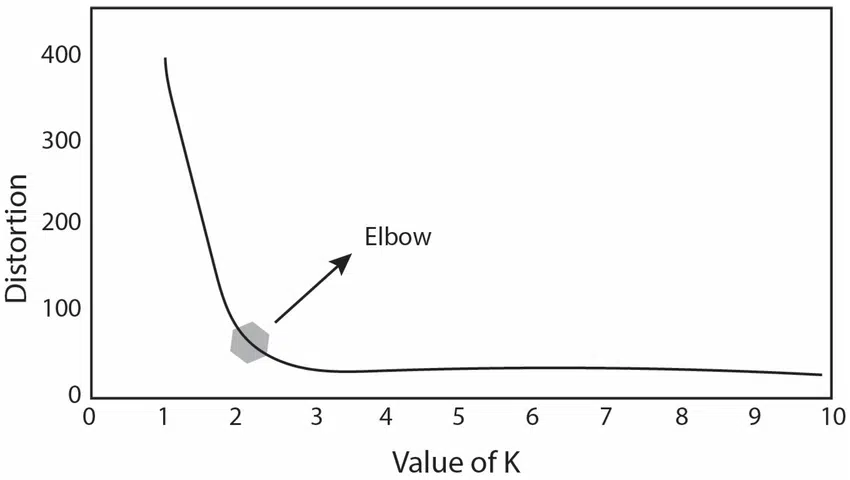

## Quelles sont les applications de la méthode kmeans ?

Au-delà de la théorie, kmeans trouve de nombreuses applications concrètes.

En marketing, il est notamment utilisé pour la segmentation RFM afin de regrouper les clients selon leur récence d’achat, leur fréquence et le montant dépensé.

En traitement d’images, il permet de quantifier une image en réduisant le nombre de couleurs possibles pour la compresser tout en conservant ses caractéristiques essentielles.

Enfin, il peut servir à la détection d’anomalies, en identifiant les points très éloignés des centroïdes après convergence, typiquement des comportements suspects, des fraudes ou des signaux de défauts machine.

## Exemple : Implémentation de kmeans avec Python

### Présentation du Jeu de données Iris 

Le jeu de données Iris a été initialement publié à l'[UCI Machine Learning Repository: Iris Data Set](https://archive.ics.uci.edu/dataset/53/iris). Ce Data Set de 1936 est souvent utilisé pour tester des algorithmes d’apprentissage automatique et des visualisations.

Le jeu de données Iris contient trois variantes de la fleur Iris. Il contient 150 instances (ligne du jeu de donnée). Chaque instance est composée de quatre attributs pour décrire une fleur d’Iris. Le jeu de données est étiquetée par le type de fleur. Ainsi pour quatre attributs décrivant une fleur d’Iris, on saura de quelle variante il s’agit.

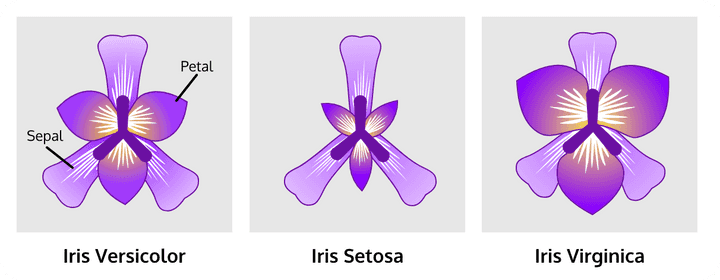

L'objectif du TD est de construire un code Python déployant la méthode *`K-means`* avec la library *`scikit-learn`* dédié aux méthodes de machine learning sous Python.

### Etapes de construction du code :

1. importer la fonction *`load_iris`* depuis le module *`sklearn.dataset`*. *`load_iris`* est une fonction utilitaire qui charge le célèbre dataset Iris pour tests et exemples.
2. Exécuter la fonction et récupérer les données en créant un objet (*`iris`*) type dictionnaire ou bunch (structure spéciale de scikit-learn).

Contenue typique :
- *`iris.data`* → array des mesures (150×4)
- *`iris.target`* → vecteur des classes (0,1,2)
- *`iris.feature_names`* → noms des colonnes
- *`iris.target_names`* → noms des espèces

3. Extraire uniquement les valeurs numériques dans une variable X. X étant un NumPy array, shape (150,4)
4. Afficher le contenu de X
5. Créer un DataFrame Pandas (df) à partir du tableau NumPy X.
6. Afficher les 5 premières lignes du DataFrame

> **Question 1**\
> Quelle est la différence entre le contenu de X et celui du DataFrame ? Discuter l'avantage de travailler avec un DataFrame.

7. Normalisation des données (création de variables centrées réduites).
- Pour cela, utiliser la classe *`StandardScaler`* de *`scikit-learn`*
- Vous pouvez instancier un objet *`scaler`* de type *`StandardScaler`*
- Vous pouvez utiliser la méthode *`fit_transform`* de l'objet `scaler`* pour la normalisation des données

8. Calculer l'inertie intra-classe pour k=1 à k=10 clusters
- Dans le cas de l'exemple, il y a 3 type de fleurs donc on sait que le nombre de clusters est k=3.
- Vérifier ce nombre en tracant l'inertie en fonction du nombre de classes en utilisant la fonction *`KMeans`*
- Tracer les courbes d'inertie pour trois valeurs (0,2,42) de l'option *`random_state`* de la fonction *`KMeans`*
 
> **Question 2**\
> Qu'est ce que l'option *`random_state`* ?\
> Qu'observe t-on ? Justifier

9. Lancer l'algorithme avec *`random_state=42`* puis tracer un scatter plot (longeur des pétales vs largeur des pétales), ajouter les centroides de chaque cluster sur le graphe

> **Question 3**\
> Qu'observe t-on ? Justifier

10. On peut lancer *`K-means*`* en faisant une boucle sur le point d'initialisation ayant la plus faible inertie avec l'option *`n_init=1000, random_state=0`*. Lancer le calcul.

> **Question 4**\
> Qu'observe t-on ? Justifier

11. Tracer les graphes 2D en croisant chacune des dimensions. Ajouter les centroides sur chaque graphe.


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

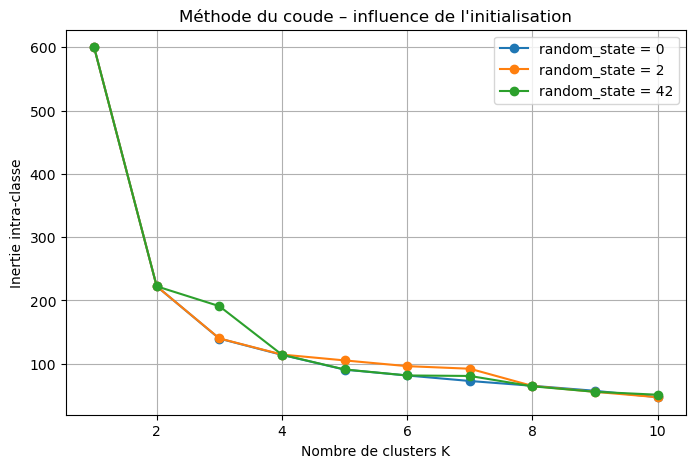

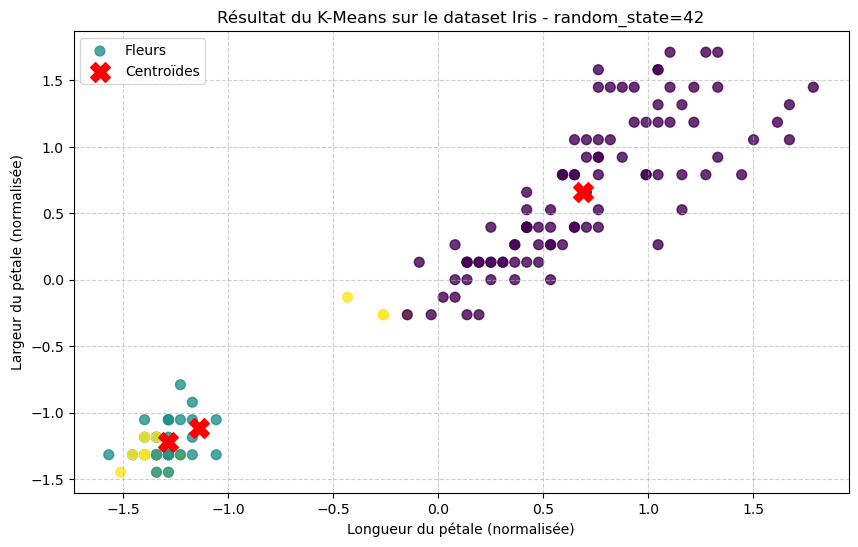

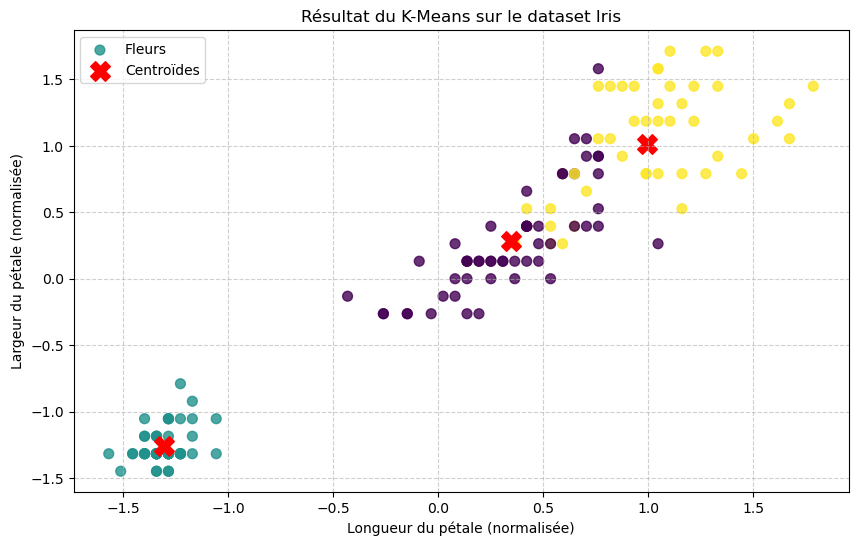


Répartition des fleurs par cluster trouvé :
cluster_kmeans
0    53
1    50
2    47
Name: count, dtype: int64


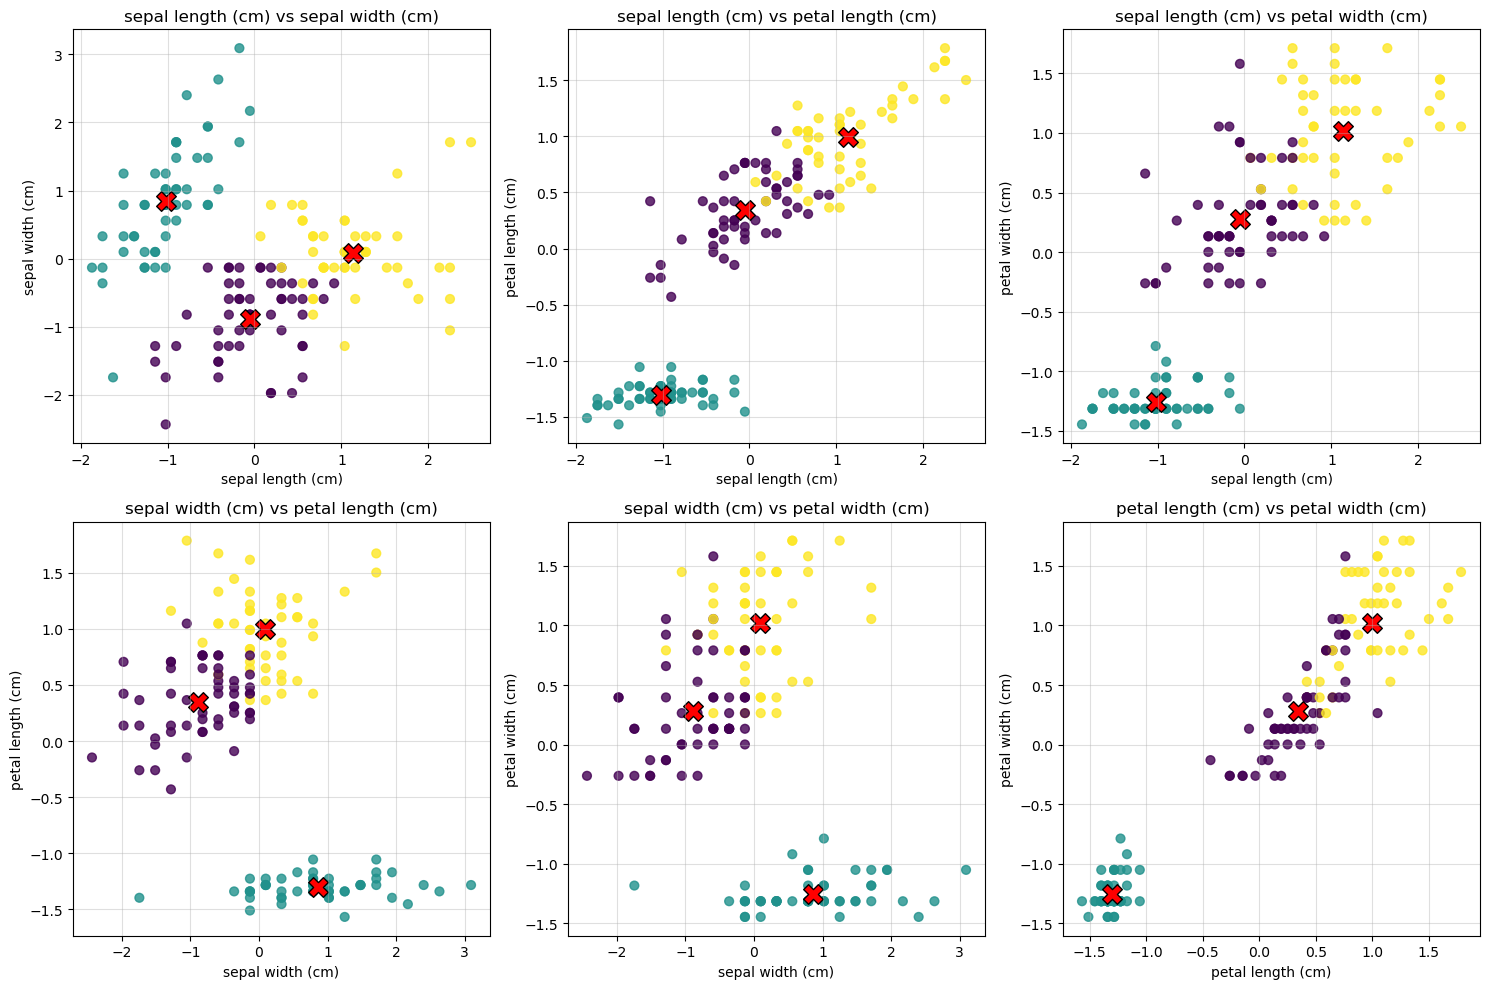

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

#-------------------------------------------------------------------------------------------
# 1. Chargement des données
#-------------------------------------------------------------------------------------------
# Le dataset Iris contient 150 échantillons de 3 espèces de fleurs différentes.
iris = load_iris()
X = iris.data  # Les mesures (features)
print(X)

# Pour la lisibilité, on le met dans un DataFrame (optionnel mais recommandé)
# Permet de passer d'une matrice numpy à un tableau avec noms de colonnes
df = pd.DataFrame(X, columns=iris.feature_names)
print("Aperçu des données brutes :")
print(df.head())

#--------------------------------------------------------------------------------------------
# 2. Préparation des données (Normalisation)
#--------------------------------------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#--------------------------------------------------------------------------------------------
# 3. Trouver le nombre optimal de clusters avec la méthode du coude
#--------------------------------------------------------------------------------------------
# On calcule l'inertie pour k de 1 à 10 et on trace le graphe
K_range = range(1, 11)
random_states = [0, 2, 42]

plt.figure(figsize=(8, 5))

for rs in random_states:
    inertias = []
    
    for k in K_range:
        km = KMeans(
            n_clusters=k,
            init='k-means++',
            random_state=rs
        )
        km.fit(X_scaled)
        inertias.append(km.inertia_)
    
    plt.plot(
        K_range,
        inertias,
        marker='o',
        label=f"random_state = {rs}"
    )

plt.xlabel("Nombre de clusters K")
plt.ylabel("Inertie intra-classe")
plt.title("Méthode du coude – influence de l'initialisation")
plt.legend()
plt.grid(True)
plt.show()

#-------------------------------------------------------------------------------------------------
# 3. Configuration & Entraînement
#-------------------------------------------------------------------------------------------------

# --- K-means sur données normalisées ---
kmeans0 = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans0.fit(X_scaled) # lance l'algotitghme de Lloyd

kmeans = KMeans(n_clusters=3, init='k-means++',n_init=1000, random_state=0)
kmeans.fit(X_scaled) # lance l'algotitghme de Lloyd

#--------------------------------------------------------------------------------------------------
# 4. Exploitation des résultats
#--------------------------------------------------------------------------------------------------

# On récupère les labels (0, 1 ou 2) attribués par l'algo
clusters = kmeans.labels_
clusters0 = kmeans0.labels_

# On ajoute le cluster au DataFrame pour analyse
df['cluster_kmeans'] = clusters
df['cluster_kmeans0'] = clusters0

#--------------------------------------------------------------------------------------------------
# 5. Visualisation
#--------------------------------------------------------------------------------------------------
# On visualise 2 dimensions : Longueur du pétale vs Largeur du pétale (version avec kmeans0)
plt.figure(figsize=(10, 6))

# Affichage des points, colorés selon leur cluster K-Means
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=clusters0, cmap='viridis', s=50, alpha=0.8, label='Fleurs')

# Affichage des Centroïdes (les croix rouges)
centers0 = kmeans0.cluster_centers_
plt.scatter(centers0[:, 2], centers0[:, 3], c='red', s=200, marker='X', label='Centroïdes')

plt.title('Résultat du K-Means sur le dataset Iris - random_state=42')
plt.xlabel('Longueur du pétale (normalisée)')
plt.ylabel('Largeur du pétale (normalisée)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# On visualise 2 dimensions : Longueur du pétale vs Largeur du pétale (version avec kmeans)
plt.figure(figsize=(10, 6))

# Affichage des points, colorés selon leur cluster K-Means
plt.scatter(X_scaled[:, 2], X_scaled[:, 3], c=clusters, cmap='viridis', s=50, alpha=0.8, label='Fleurs')

# Affichage des Centroïdes (les croix rouges)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='red', s=200, marker='X', label='Centroïdes')

plt.title('Résultat du K-Means sur le dataset Iris')
plt.xlabel('Longueur du pétale (normalisée)')
plt.ylabel('Largeur du pétale (normalisée)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Tableau de répartition des fleurs par cluster
print("\nRépartition des fleurs par cluster trouvé :")
print(df['cluster_kmeans'].value_counts())

# Visualisation de toutes les paires de features
features = df.columns
pairs = list(itertools.combinations(range(X.shape[1]), 2))

centers = kmeans.cluster_centers_

plt.figure(figsize=(15, 10))

for idx, (i, j) in enumerate(pairs):
    plt.subplot(2, 3, idx + 1)

    # Points
    plt.scatter(
        X_scaled[:, i], X_scaled[:, j],
        c=clusters,
        cmap='viridis',
        s=40,
        alpha=0.8
    )

    # Centroïdes projetés
    plt.scatter(
        centers[:, i], centers[:, j],
        c='red',
        s=200,
        marker='X',
        edgecolors='black',
        label='Centroïdes'
    )

    plt.xlabel(features[i])
    plt.ylabel(features[j])
    plt.title(f"{features[i]} vs {features[j]}")
    plt.grid(True, alpha=0.4)

plt.tight_layout()
plt.show()